In [1]:
import hydra
from omegaconf import DictConfig, OmegaConf

# sorrel imports
from sorrel.examples.cleanup.agents import CleanupAgent
from sorrel.examples.cleanup.entities import EmptyEntity
from sorrel.examples.cleanup.env import CleanupEnv, ENTITY_LIST
from sorrel.examples.cleanup.world import CleanupWorld
from sorrel.action.action_spec import ActionSpec
from sorrel.models.human_player import HumanPlayer, HumanObservation

### Human player test for the model

In [ ]:
def main():
    config = OmegaConf.load("../configs/config.yaml")
    agents = []
    for _ in range(config.agent.agent.num):
        observation_spec = HumanObservation(
                    entity_list=ENTITY_LIST,
                    full_view=True,
                    env_dims=(config.env.height, config.env.width)
                )
        action_spec = ActionSpec(["up", "down", "left", "right", "clean", "zap"])
        agents.append(
            CleanupAgent(
                observation_spec=observation_spec,
                action_spec=action_spec,
                model=HumanPlayer(
                    input_size=(config.env.height, config.env.width, config.env.layers),
                    action_space=action_spec.n_actions,
                    memory_size=1
                )
            )
            )
        
    env = CleanupWorld(config=config, default_entity=EmptyEntity())
    experiment = CleanupEnv(env, config)
    experiment.override_agents(
        agents=agents
    )
    experiment.run_experiment()

### Turn taking loop
Choose an action from [0, 1, 2, 3, 4, 5] to act on the environment.

[(336, 496, 4), (336, 496, 4), (336, 496, 4)]
(1, 1999872)
(1, 1999872)
(3, 336, 496, 4)


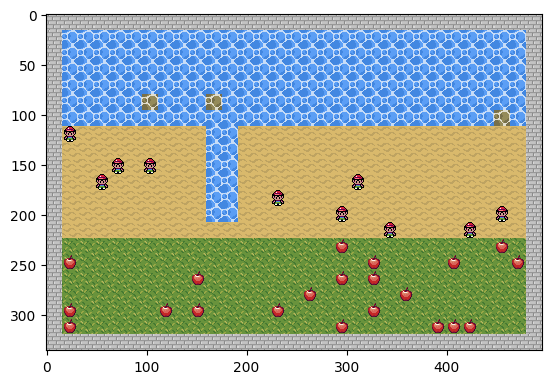

Please try again. Possible actions are below.


UFuncTypeError: ufunc 'add' did not contain a loop with signature matching types (dtype('int64'), dtype('<U4')) -> None

In [3]:
main()